In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load datasets
# ads_data = pd.read_csv("/home/yadasa/Desktop/marketing-analytics/data/raw/bank_ads.csv")
# app_review = pd.read_csv("/home/yadasa/Desktop/marketing-analytics/data/raw/playstore_reviews.csv")
# channel_subscriptions = pd.read_csv("/home/yadasa/Desktop/marketing-analytics/data/raw/daily_telegram_subscriptions.csv")
# app_installation=pd.read_csv("/home/yadasa/Desktop/marketing-analytics/data/raw/installations.csv")

In [12]:
import psycopg2
import pandas as pd

# Database connection parameters
db_config = {
    'dbname': 'tickvah_banks_ads',
    'user': 'postgres',
    'password': 'admin',
    'host': 'localhost',
    'port': '5432'
}

# Create a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname=db_config['dbname'],
    user=db_config['user'],
    password=db_config['password'],
    host=db_config['host'],
    port=db_config['port']
)

# Create a cursor object using the connection
cur = conn.cursor()

# Example queries to load data from tables
queries = [
    "SELECT * FROM bank_advertisements",
    "SELECT * FROM daily_install_count",
    "SELECT * FROM telegram_subscriptions",
    "SELECT * FROM playstore_reviews_info"
]

# Empty list to hold DataFrames
dfs = []

# Execute the queries and fetch all results for each table
for query in queries:
    cur.execute(query)
    data = cur.fetchall()
    
    # Get column names from cursor's description
    column_names = [desc[0] for desc in cur.description]
    
    # Create DataFrame with column names
    df = pd.DataFrame(data, columns=column_names)
    dfs.append(df)

# Close cursor and connection
cur.close()
conn.close()

# Now you have separate DataFrames for each table
tickvah_ads = dfs[0]
App_install = dfs[1]
telegramsubscription = dfs[2]
playstorereviews = dfs[3]




In [6]:
import pandas as pd
from textblob import TextBlob
import psycopg2

# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to extract keywords from text using TextBlob
def extract_keywords(text):
    blob = TextBlob(text)
    keywords = blob.noun_phrases
    keywords_str = ', '.join(keywords)
    return keywords_str

# Database connection parameters
db_config = {
    'dbname': 'tickvah_banks_ads',
    'user': 'postgres',
    'password': 'admin',
    'host': 'localhost',
    'port': '5432'
}

# Create a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname=db_config['dbname'],
    user=db_config['user'],
    password=db_config['password'],
    host=db_config['host'],
    port=db_config['port']
)

# Create a cursor object using the connection
cur = conn.cursor()

# Example queries to load data from tables
queries = [
    "SELECT * FROM bank_advertisements",
    "SELECT * FROM daily_install_count",
    "SELECT * FROM telegram_subscriptions",
    "SELECT * FROM playstore_reviews_info"
]

# Empty list to hold DataFrames
dfs = []

# Execute the queries and fetch all results for each table
for query in queries:
    cur.execute(query)
    data = cur.fetchall()
    column_names = [desc[0] for desc in cur.description]
    df = pd.DataFrame(data, columns=column_names)
    dfs.append(df)

# Close cursor and connection
cur.close()
conn.close()

# Now you have separate DataFrames for each table
tickvah_ads = dfs[0]
App_install = dfs[1]
telegramsubscription = dfs[2]
playstorereviews = dfs[3]

# Apply keyword extraction and sentiment analysis functions to 'content' column
playstorereviews['keywords'] = playstorereviews['content'].apply(extract_keywords)
playstorereviews['sentiment'] = playstorereviews['content'].apply(get_sentiment)


# Re-establish connection to the PostgreSQL database to update the table
conn = psycopg2.connect(
    dbname=db_config['dbname'],
    user=db_config['user'],
    password=db_config['password'],
    host=db_config['host'],
    port=db_config['port']
)

# Create a cursor object using the connection
cur = conn.cursor()

# Update the table with sentiment and keywords information
update_query = """
    UPDATE playstore_reviews_info
    SET sentiment = %s, keywords = %s
    WHERE "reviewId" = %s
"""

for index, row in playstorereviews.iterrows():
    sentiment = row['sentiment']
    keywords = row['keywords']
    reviewId = row['reviewId']
    cur.execute(update_query, (sentiment, keywords, reviewId))

# Commit the transaction
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()


In [7]:
tickvah_ads.head()

,date,post_link,view,post_hour,bank,time_of_day
0,2024-05-14 07:49:21,https://t.me/tikvahethiopia/87636,249796,7,BOA,Morning
1,2024-05-10 13:39:46,https://t.me/tikvahethiopia/87532,280083,13,BOA,Afternoon
2,2024-05-07 10:46:34,https://t.me/tikvahethiopia/87496,304194,10,BOA,Morning
3,2024-04-30 17:01:34,https://t.me/tikvahethiopia/87344,234557,17,BOA,Afternoon
4,2024-04-26 18:11:43,https://t.me/tikvahethiopia/87236,263870,18,BOA,Evening


In [72]:
telegramsubscription.head(10)

,id,date,subscribers
0,68,2017-02-19,161596
1,69,2017-02-20,161596
2,70,2017-02-21,161596
3,71,2017-02-22,161596
4,72,2017-02-23,161596
5,73,2017-02-24,161596
6,74,2017-02-25,161596
7,75,2017-02-26,161597
8,76,2017-02-27,161597
9,77,2017-02-28,161597


In [11]:
App_install.head()

,date,install_count
0,2024-04-29,2
1,2024-04-30,314
2,2024-05-01,20
3,2024-05-02,22
4,2024-05-03,95


In [10]:
playstorereviews.head(10)

,reviewId,userName,userImage,thumbsUp,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,score,content,keywords,lda_category,sentiment,insight
0,322c12e9-1e9a-4609-b4c0-3ef5f78ff589,Yonas A,https://play-lh.googleusercontent.com/a-/ALV-U...,10,24.05.07,2024-05-21 10:17:07,None,None,24.05.07,1,Playstore need to have some option to give 0 s...,"playstore, ca n't manage, good mobile applicat...",,positive,"Positive review; Keywords: playstore, ca n't m..."
1,322c12e9-1e9a-4609-b4c0-3ef5f78ff589,Yonas A,https://play-lh.googleusercontent.com/a-/ALV-U...,10,24.05.07,2024-05-21 10:17:07,None,None,24.05.07,1,Playstore need to have some option to give 0 s...,"playstore, ca n't manage, good mobile applicat...",None,positive,None
2,42e6b999-2d95-4374-bf40-93c60d08c58f,Abdurezak Awol,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.05.07,2024-05-20 20:29:06,None,None,24.05.07,2,It's good when i've downloaded at first. But n...,"i 've, n't work",,positive,"Positive review; Keywords: i 've, n't work;"
3,42e6b999-2d95-4374-bf40-93c60d08c58f,Abdurezak Awol,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.05.07,2024-05-20 20:29:06,None,None,24.05.07,2,It's good when i've downloaded at first. But n...,"i 've, n't work",None,positive,None
4,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-21 20:38:28,None,None,24.05.07,5,All,,None,neutral,None
5,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-21 20:38:28,None,None,24.05.07,5,All,,,neutral,Neutral review;
6,9340824c-f839-4afe-81af-cd398088f470,Ahadu tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-21 17:53:34,None,None,24.05.07,1,Very poor,,None,negative,None
7,9340824c-f839-4afe-81af-cd398088f470,Ahadu tesfaye,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-21 17:53:34,None,None,24.05.07,1,Very poor,,,negative,Negative review;
8,68fe0a10-cfc1-4bdd-b447-271fea684980,Adane Kelelew,https://play-lh.googleusercontent.com/a/ACg8oc...,0,None,2024-05-21 13:55:00,None,None,None,5,Excellent,excellent,None,positive,None
9,68fe0a10-cfc1-4bdd-b447-271fea684980,Adane Kelelew,https://play-lh.googleusercontent.com/a/ACg8oc...,0,None,2024-05-21 13:55:00,None,None,None,5,Excellent,excellent,,positive,Positive review; Keywords: excellent;


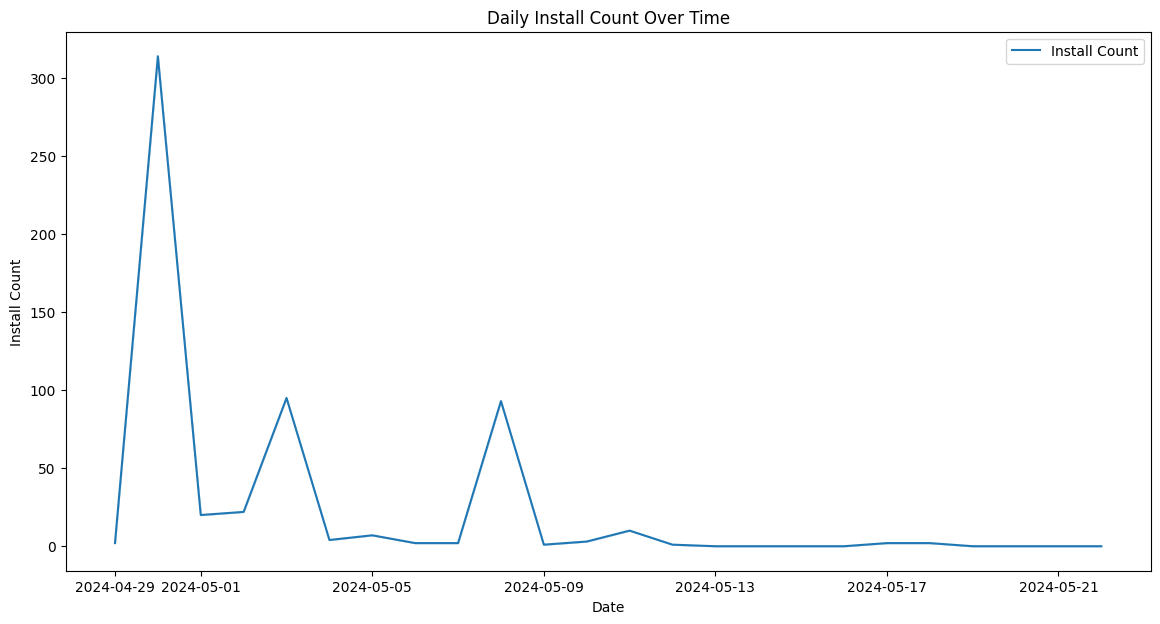

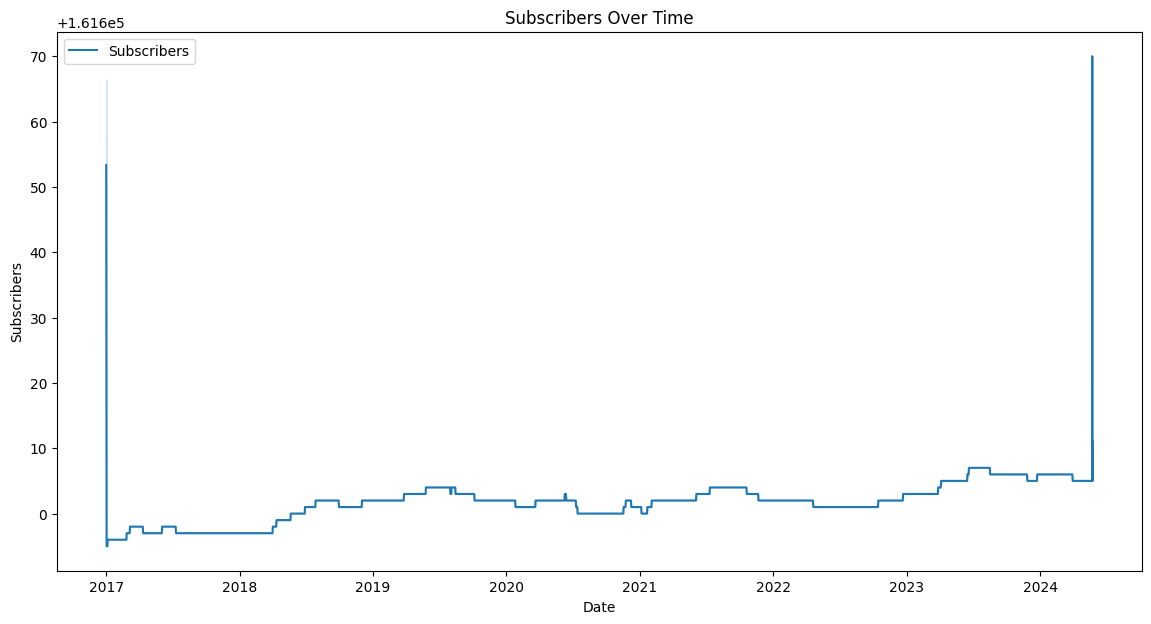

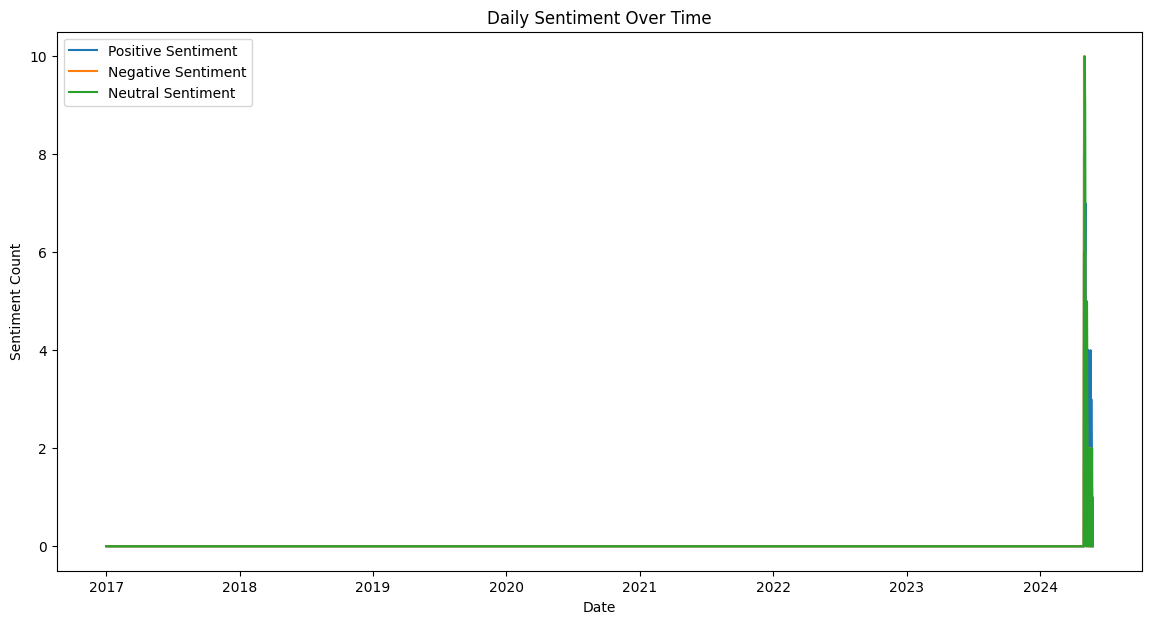

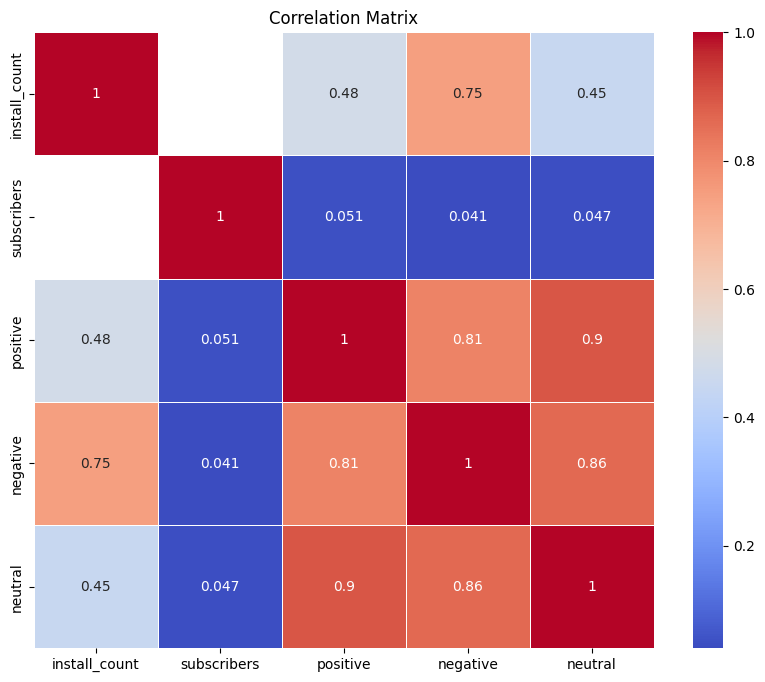

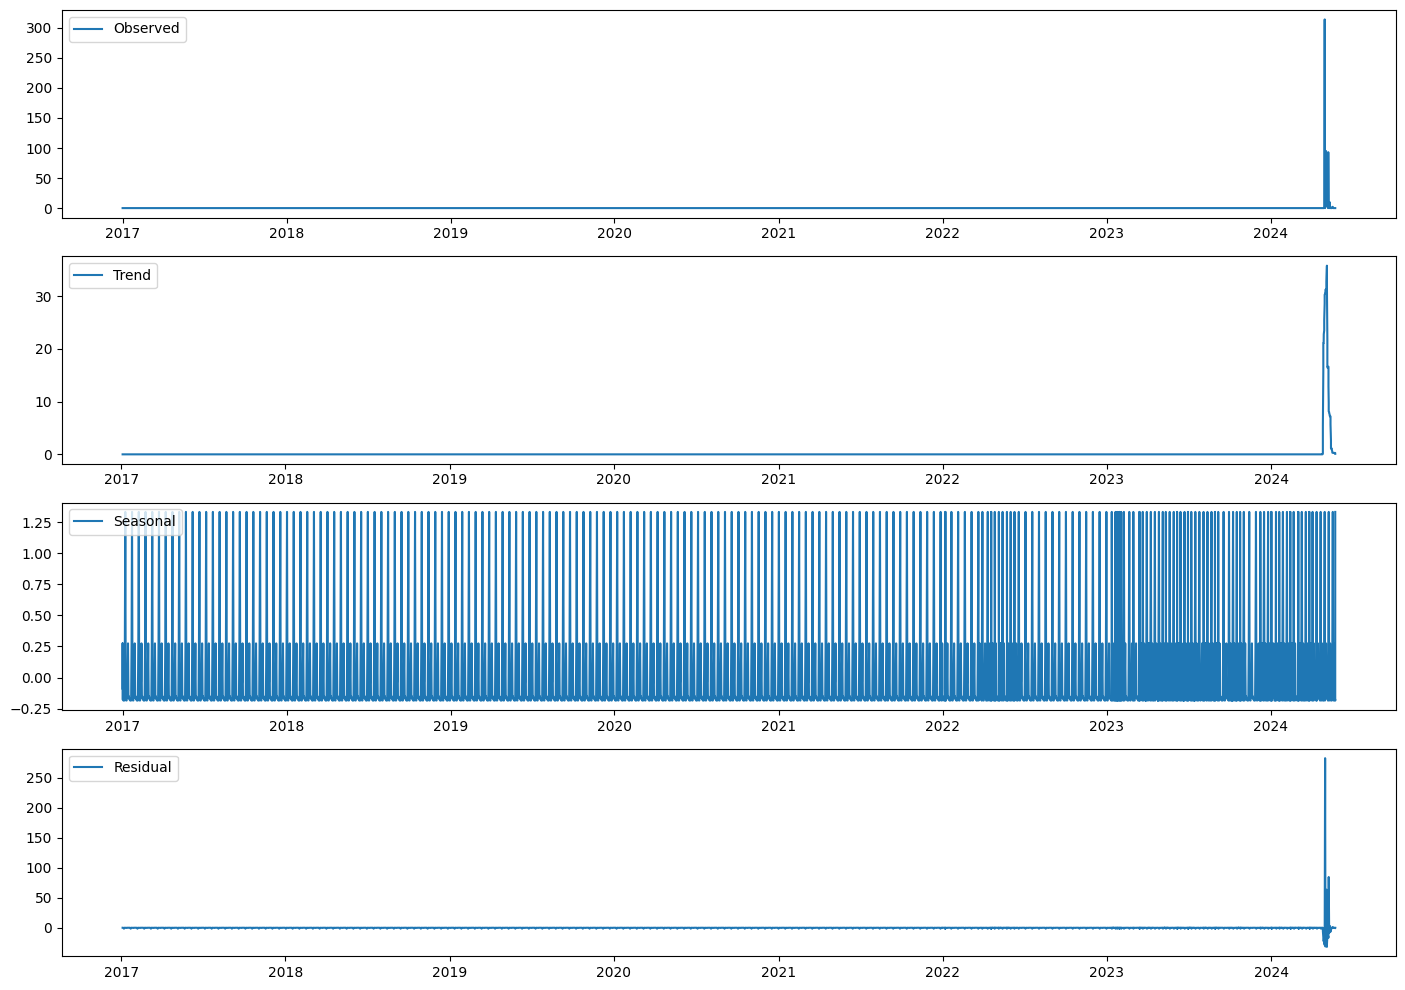

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the date columns to datetime
tickvah_ads['date'] = pd.to_datetime(tickvah_ads['date'])
App_install['date'] = pd.to_datetime(App_install['date'])
telegramsubscription['date'] = pd.to_datetime(telegramsubscription['date'])
playstorereviews['at'] = pd.to_datetime(playstorereviews['at'])

# Aggregate the sentiment data to a daily level
daily_sentiment = playstorereviews.groupby([playstorereviews['at'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Reset the index and rename the columns
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)
daily_sentiment = daily_sentiment.rename_axis('date').reset_index()

# Merge all DataFrames on the 'date' column
merged_df = pd.merge(tickvah_ads, App_install, on='date', how='outer')
merged_df = pd.merge(merged_df, telegramsubscription, on='date', how='outer')
merged_df = pd.merge(merged_df, daily_sentiment, on='date', how='outer')

# Fill missing values with 0 for sentiment columns
sentiment_cols = ['positive', 'negative', 'neutral']
for col in sentiment_cols:
    if col not in merged_df:
        merged_df[col] = 0

merged_df[sentiment_cols] = merged_df[sentiment_cols].fillna(0)

# Visualization

# Plot install count over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='date', y='install_count', label='Install Count')
plt.title('Daily Install Count Over Time')
plt.xlabel('Date')
plt.ylabel('Install Count')
plt.legend()
plt.show()

# Plot subscriber count over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='date', y='subscribers', label='Subscribers')
plt.title('Subscribers Over Time')
plt.xlabel('Date')
plt.ylabel('Subscribers')
plt.legend()
plt.show()

# Plot sentiment over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='date', y='positive', label='Positive Sentiment')
sns.lineplot(data=merged_df, x='date', y='negative', label='Negative Sentiment')
sns.lineplot(data=merged_df, x='date', y='neutral', label='Neutral Sentiment')
plt.title('Daily Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.legend()
plt.show()

# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = merged_df[['install_count', 'subscribers'] + sentiment_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Time Series Decomposition for Install Count
decomposition = seasonal_decompose(merged_df.set_index('date')['install_count'].fillna(0), model='additive', period=30)

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
playstorereviews.head()

,reviewId,userName,userImage,thumbsUp,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,score,content,keywords,lda_category,sentiment,insight
0,322c12e9-1e9a-4609-b4c0-3ef5f78ff589,Yonas A,https://play-lh.googleusercontent.com/a-/ALV-U...,10,24.05.07,2024-05-21 10:17:07,None,None,24.05.07,1,Playstore need to have some option to give 0 s...,"playstore, ca n't manage, good mobile applicat...",,positive,"Positive review; Keywords: playstore, ca n't m..."
1,322c12e9-1e9a-4609-b4c0-3ef5f78ff589,Yonas A,https://play-lh.googleusercontent.com/a-/ALV-U...,10,24.05.07,2024-05-21 10:17:07,None,None,24.05.07,1,Playstore need to have some option to give 0 s...,"playstore, ca n't manage, good mobile applicat...",None,positive,None
2,42e6b999-2d95-4374-bf40-93c60d08c58f,Abdurezak Awol,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.05.07,2024-05-20 20:29:06,None,None,24.05.07,2,It's good when i've downloaded at first. But n...,"i 've, n't work",,positive,"Positive review; Keywords: i 've, n't work;"
3,42e6b999-2d95-4374-bf40-93c60d08c58f,Abdurezak Awol,https://play-lh.googleusercontent.com/a/ACg8oc...,0,24.05.07,2024-05-20 20:29:06,None,None,24.05.07,2,It's good when i've downloaded at first. But n...,"i 've, n't work",None,positive,None
4,fe54afea-6f7b-4fee-bc8a-4af38050cc54,Mohammed Kasim,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.05.07,2024-05-21 20:38:28,None,None,24.05.07,5,All,,None,neutral,None


In [80]:
App_install.head()

,date,install_count
0,2024-04-29,2
1,2024-04-30,314
2,2024-05-01,20
3,2024-05-02,22
4,2024-05-03,95
